In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
from google.colab import auth
import gspread
from google.auth import default

In [6]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [7]:
worksheet = gc.open('Saigs1').sheet1
data = worksheet.get_all_values()

In [9]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'INPUT':'float'})
dataset1 = dataset1.astype({'OUTPUT':'float'})

In [10]:
dataset1.head()

,INPUT,OUTPUT
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [12]:
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

In [13]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [17]:
Scaler = MinMaxScaler()

In [18]:
Scaler.fit(X_train)

MinMaxScaler()

In [19]:
ai_brain=Sequential([
    Dense(9,activation='relu',input_shape=[1]),
    Dense(16,activation='relu'),
    Dense(1),
])
ai_brain.compile(optimizer='rmsprop',loss='mse')
ai_brain.fit(X_train,y_train,epochs=1000)
ai_brain.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 762ms/step - loss: 14256.3066
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 14171.9912
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 14112.0176
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 14062.2197
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 14018.1865
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 13977.9551
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 13940.4551
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 13905.0156
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 13871.1895
Epoch 10/1000
1/1 [==============================] - 0s 12ms/step - loss: 13838.6602
Epoch 11/1000
1/1 [==============================] - 0s 12ms/step - loss: 13807.1973
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 1

In [20]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

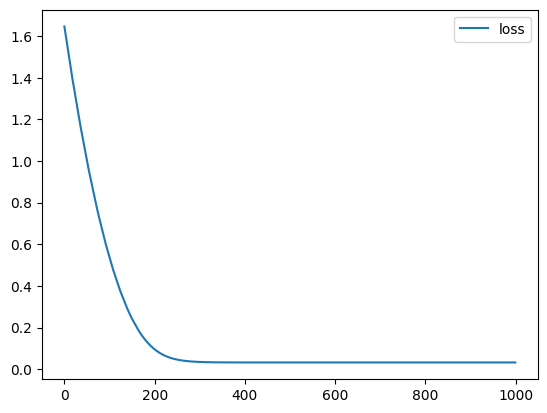

In [21]:
loss_df.plot()

In [22]:
X_test1 = Scaler.transform(X_test)

In [23]:
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 394ms/step - loss: 15568.5332


15568.533203125

In [24]:
X_n1 = [[30]]

In [25]:
X_n1_1 = Scaler.transform(X_n1)

In [26]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 88ms/step


array([[16.586756]], dtype=float32)